#Lesson 1

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np

In [ ]:
tokenizer= Tokenizer()

data= "In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

corpus= data.lower().split('\n')

tokenizer.fit_on_texts(corpus)
total_words= len(tokenizer.word_index)+ 1

print(tokenizer.word_index)
print(total_words)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [ ]:
input_sequences= []
for line in corpus:
  token_list= tokenizer.texts_to_sequences([line])[0]
  for i in range(len(token_list)):
    n_gram_sequence= token_list[:i+1]
    input_sequences.append(n_gram_sequence)

max_sequence_len= max([len(x) for x in input_sequences])
input_sequences= np.array(pad_sequences(input_sequences, maxlen= max_sequence_len, padding='pre'))

xs, labels= input_sequences[:,:-1], input_sequences[:,-1]

ys= tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['town'])

print(xs[6])

4
66
[ 0  0  0  0  4  2 66  8 67 68]


In [ ]:
print(ys[6])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
print(xs[5])
print(ys[5])

[ 0  0  0  0  0  4  2 66  8 67]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
print(tokenizer.word_index)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [ ]:
model= Sequential()
model.add(Embedding(total_words, 64, input_length= max_sequence_len))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history= model.fit(xs, ys, epochs= 500, verbose= 1)

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

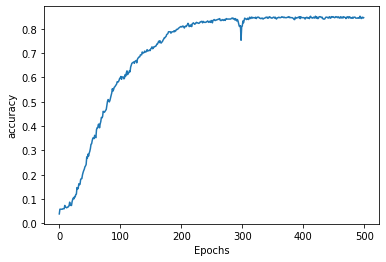

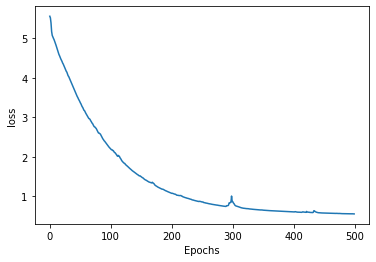

In [ ]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
seed_text= 'Jasmeet went to dublin'
next_words= 50

for _ in range(next_words):
  token_list= tokenizer.texts_to_sequences([seed_text])[0]
  token_list= pad_sequences([token_list], maxlen= max_sequence_len -1, padding= 'pre')
  predicted= model.predict_classes(token_list, verbose= 0)
  output_word= ''
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word= word
      break
  seed_text += ' ' + output_word
print(seed_text)

Jasmeet went to dublin his plenty as water water suppose nelly rose ned call strangled hall suppose nelly wine them steps out and them the girls and saw the same time bees old might rose glisten glisten hall hall suppose nelly hall suppose saw round them round a eyes nelly hall hall hall hall


#Lesson 2

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
  -O /tmp/irish-lyrics-eof.txt

--2020-11-10 10:42:35--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.13.240, 172.217.7.208, 172.217.7.176, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.13.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0s      

2020-11-10 10:42:35 (146 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [ ]:
tokenizer= Tokenizer()

data= open('/tmp/irish-lyrics-eof.txt').read()

corpus= data.lower().split('\n')

tokenizer.fit_on_texts(corpus)
total_words= len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [ ]:
input_sequences= []
for line in corpus:
  token_list= tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence= token_list[:i+1]
    input_sequences.append(n_gram_sequence)

max_sequence_len= max([len(x) for x in input_sequences])
input_sequences= np.array(pad_sequences(input_sequences, maxlen= max_sequence_len, padding= 'pre'))

xs, labels= input_sequences[:,:-1], input_sequences[:, -1]

ys= tf.keras.utils.to_categorical(labels, num_classes= total_words)

In [ ]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [ ]:
print(xs[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]


In [ ]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [ ]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [ ]:
model= Sequential()
model.add(Embedding(total_words, 100, input_length= max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam= Adam(lr= 0.01)
model.compile(loss= 'categorical_crossentropy', optimizer= adam, metrics= ['accuracy'])
history= model.fit(xs, ys, epochs=100, verbose= 1)
print(model)

Epoch 1/100
377/377 [==============================] - 3s 9ms/step - loss: 6.6144 - accuracy: 0.0743
Epoch 2/100
377/377 [==============================] - 3s 9ms/step - loss: 5.7224 - accuracy: 0.1199
Epoch 3/100
377/377 [==============================] - 3s 9ms/step - loss: 4.7963 - accuracy: 0.1726
Epoch 4/100
377/377 [==============================] - 3s 9ms/step - loss: 3.8558 - accuracy: 0.2471
Epoch 5/100
377/377 [==============================] - 3s 9ms/step - loss: 2.9974 - accuracy: 0.3564
Epoch 6/100
377/377 [==============================] - 3s 9ms/step - loss: 2.3419 - accuracy: 0.4663
Epoch 7/100
377/377 [==============================] - 3s 9ms/step - loss: 1.8830 - accuracy: 0.5595
Epoch 8/100
377/377 [==============================] - 3s 9ms/step - loss: 1.5356 - accuracy: 0.6286
Epoch 9/100
377/377 [==============================] - 3s 9ms/step - loss: 1.3114 - accuracy: 0.6810
Epoch 10/100
377/377 [==============================] - 3s 9ms/step - loss: 1.1980 - accura

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

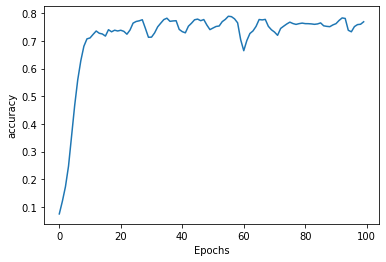

In [ ]:
plot_graphs(history, 'accuracy')

In [ ]:
seed_text= "I've got a bad feeling about this"
next_words= 100

for _ in range(next_words):
  token_list= tokenizer.texts_to_sequences([seed_text])[0]
  token_list= pad_sequences([token_list], maxlen= max_sequence_len-1, padding= 'pre')
  predicted= model.predict_classes(token_list, verbose= 0)
  output_word= ''
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word= word
      break
  seed_text += ' ' + output_word
print(seed_text)

I've got a bad feeling about this proud saxon and tory wished dead and gone away his silver stream gone gone and gone gone gone gone calling blue sea silver mary corn im valleys hushed in days gone before somewhere but gone before i surrendered there does shawl love gone and saint patrick love gone unfurled gone gone gone by and gone calling tell my rapier who drop oer the mountains each form of gone away gone gone before i drinkin raising tomorrow or step soldiers too alas we safely corn through wid the valley rings end all sure were bare colonel farrell to right till see


#Lesson 3

Using RNNs to create large body of texts
https://www.tensorflow.org/tutorials/text/text_generation

In [ ]:
import tensorflow as tf
import numpy as np
import os
import time

In [ ]:
path_to_file= tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

1122304/1115394 [==============================] - 0s 0us/step


In [ ]:
text= open(path_to_file, 'rb').read().decode(encoding= 'utf-8')
print('Length of text: {} characters'.format(len(text)))

Length of text: 1115394 characters


In [ ]:
print(text[:250])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.



In [ ]:
vocab= sorted(set(text))
print('{} unique characters'.format(len(vocab)))

65 unique characters


In [ ]:
char2idx= {u:i for i,u in enumerate(vocab)}
idx2char= np.array(vocab)

text_as_int= np.array([char2idx[c] for c in text])

In [ ]:
print('{')
for char, _ in zip(char2idx, range(20)):
  print('   {:4s}:  {:3d},'.format(repr(char), char2idx[char]))

print(' ...\n')

{
   '\n':    0,
   ' ' :    1,
   '!' :    2,
   '$' :    3,
   '&' :    4,
   "'" :    5,
   ',' :    6,
   '-' :    7,
   '.' :    8,
   '3' :    9,
   ':' :   10,
   ';' :   11,
   '?' :   12,
   'A' :   13,
   'B' :   14,
   'C' :   15,
   'D' :   16,
   'E' :   17,
   'F' :   18,
   'G' :   19,
 ...



In [ ]:
print('{} ---- characters mapped to int ---- > {}'.format(repr(text[:13]), text_as_int[:13]))

'First Citizen' ---- characters mapped to int ---- > [18 47 56 57 58  1 15 47 58 47 64 43 52]


In [ ]:
seq_length= 100
examples_per_epoch= len(text)//(seq_length+1)
char_dataset= tf.data.Dataset.from_tensor_slices(text_as_int)
for i in char_dataset.take(5):
  print(idx2char[i.numpy()])

F
i
r
s
t


In [ ]:
sequences= char_dataset.batch(seq_length+1, drop_remainder=True)
for item in sequences.take(5):
  print(repr(''.join(idx2char[item.numpy()])))

'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '
'are all resolved rather to die than to famish?\n\nAll:\nResolved. resolved.\n\nFirst Citizen:\nFirst, you k'
"now Caius Marcius is chief enemy to the people.\n\nAll:\nWe know't, we know't.\n\nFirst Citizen:\nLet us ki"
"ll him, and we'll have corn at our own price.\nIs't a verdict?\n\nAll:\nNo more talking on't; let it be d"
'one: away, away!\n\nSecond Citizen:\nOne word, good citizens.\n\nFirst Citizen:\nWe are accounted poor citi'


In [ ]:
def split_input_target(chunk):
  input_text= chunk[:-1]
  target_text= chunk[1:]
  return input_text, target_text

dataset= sequences.map(split_input_target)

In [ ]:
for input_example, target_example in dataset.take(1):
  print('Input data: ', repr(''.join(idx2char[input_example.numpy()])))
  print('Target data:', repr(''.join(idx2char[target_example.numpy()])))

Input data:  'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou'
Target data: 'irst Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '


In [ ]:
for i, (input_idx, target_idx) in enumerate(zip(input_example[:5], target_example[:5])):
    print("Step {:4d}".format(i))
    print("  input: {} ({:s})".format(input_idx, repr(idx2char[input_idx])))
    print("  expected output: {} ({:s})".format(target_idx, repr(idx2char[target_idx])))

Step    0
  input: 18 ('F')
  expected output: 47 ('i')
Step    1
  input: 47 ('i')
  expected output: 56 ('r')
Step    2
  input: 56 ('r')
  expected output: 57 ('s')
Step    3
  input: 57 ('s')
  expected output: 58 ('t')
Step    4
  input: 58 ('t')
  expected output: 1 (' ')


In [ ]:
# Batch size
BATCH_SIZE = 64

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

dataset

<BatchDataset shapes: ((64, 100), (64, 100)), types: (tf.int64, tf.int64)>

In [ ]:
# Length of the vocabulary in chars
vocab_size = len(vocab)

# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024

In [ ]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
  model= tf.keras.Sequential([
                              tf.keras.layers.Embedding(vocab_size, embedding_dim, batch_input_shape= [batch_size, None]),
                              tf.keras.layers.GRU(rnn_units, return_sequences=True, stateful=True, recurrent_initializer='glorot_uniform'),
                              tf.keras.layers.Dense(vocab_size)
  ])
  return model

In [ ]:
model= build_model(len(vocab), embedding_dim, rnn_units, BATCH_SIZE)

In [ ]:
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(64, 100, 65) # (batch_size, sequence_length, vocab_size)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (64, None, 256)           16640     
_________________________________________________________________
gru (GRU)                    (64, None, 1024)          3938304   
_________________________________________________________________
dense (Dense)                (64, None, 65)            66625     
Total params: 4,021,569
Trainable params: 4,021,569
Non-trainable params: 0
_________________________________________________________________


In [ ]:
sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
sampled_indices = tf.squeeze(sampled_indices,axis=-1).numpy()

In [ ]:
sampled_indices

array([33, 61, 50, 23, 46, 28, 46, 50, 23, 23, 25,  3, 64, 41, 63, 26,  6,
       17, 61, 64, 51, 34, 18, 32, 27, 37, 48, 34, 63, 21, 19,  4, 43, 34,
        0, 33, 19, 35, 25, 15, 41, 23, 44, 50, 20, 17, 58, 62, 52, 33, 22,
       10, 50, 10, 61, 32, 55, 57, 35, 21, 28, 58, 47, 60, 31,  6, 23, 60,
       14, 61, 52, 64, 24, 12, 41, 19, 14, 64, 27,  0, 47, 60, 51, 51, 41,
       40, 29, 55, 13,  3, 30, 31, 55, 15, 36, 16, 54, 38, 35, 38])

In [ ]:
print("Input: \n", repr("".join(idx2char[input_example_batch[0]])))
print()
print("Next Char Predictions: \n", repr("".join(idx2char[sampled_indices ])))

Input: 
 'ealty to the new-made king.\n\nDUCHESS OF YORK:\nWelcome, my son: who are the violets now\nThat strew th'

Next Char Predictions: 
 'UwlKhPhlKKM$zcyN,EwzmVFTOYjVyIG&eV\nUGWMCcKflHEtxnUJ:l:wTqsWIPtivS,KvBwnzL?cGBzO\nivmmcbQqA$RSqCXDpZWZ'


In [ ]:
def loss(labels, logits):
    return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

example_batch_loss = loss(target_example_batch, example_batch_predictions)
print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
print("scalar_loss:      ", example_batch_loss.numpy().mean())

Prediction shape:  (64, 100, 65)  # (batch_size, sequence_length, vocab_size)
scalar_loss:       4.172553


In [ ]:
model.compile(optimizer='adam', loss=loss, metrics= ['accuracy'])

In [ ]:
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

In [ ]:
EPOCHS = 10

In [ ]:
history = model.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback])

Epoch 1/10
172/172 [==============================] - 10s 56ms/step - loss: 2.0334 - accuracy: 0.4088
Epoch 2/10
172/172 [==============================] - 10s 57ms/step - loss: 1.6715 - accuracy: 0.5060
Epoch 3/10
172/172 [==============================] - 10s 58ms/step - loss: 1.5060 - accuracy: 0.5493
Epoch 4/10
172/172 [==============================] - 10s 59ms/step - loss: 1.4160 - accuracy: 0.5722
Epoch 5/10
172/172 [==============================] - 10s 61ms/step - loss: 1.3562 - accuracy: 0.5873
Epoch 6/10
172/172 [==============================] - 10s 59ms/step - loss: 1.3076 - accuracy: 0.5996
Epoch 7/10
172/172 [==============================] - 10s 58ms/step - loss: 1.2664 - accuracy: 0.6102
Epoch 8/10
172/172 [==============================] - 10s 58ms/step - loss: 1.2274 - accuracy: 0.6212
Epoch 9/10
172/172 [==============================] - 10s 58ms/step - loss: 1.1898 - accuracy: 0.6317
Epoch 10/10
172/172 [==============================] - 10s 57ms/step - loss: 1.152

In [ ]:
tf.train.latest_checkpoint(checkpoint_dir)

'./training_checkpoints/ckpt_10'

In [ ]:
model = build_model(vocab_size, embedding_dim, rnn_units, batch_size=1)

model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))

model.build(tf.TensorShape([1, None]))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (1, None, 256)            16640     
_________________________________________________________________
gru_1 (GRU)                  (1, None, 1024)           3938304   
_________________________________________________________________
dense_1 (Dense)              (1, None, 65)             66625     
Total params: 4,021,569
Trainable params: 4,021,569
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def generate_text(model, start_string):
    # Evaluation step (generating text using the learned model)

    # Number of characters to generate
    num_generate = 1000

    # Converting our start string to numbers (vectorizing)
    input_eval = [char2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)

    # Empty string to store our results
    text_generated = []

    # Low temperature results in more predictable text.
    # Higher temperature results in more surprising text.
    # Experiment to find the best setting.
    temperature = 1.0

    # Here batch size == 1
    model.reset_states()
    for i in range(num_generate):
        predictions = model(input_eval)
        # remove the batch dimension
        predictions = tf.squeeze(predictions, 0)

        # using a categorical distribution to predict the character returned by the model
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

        # Pass the predicted character as the next input to the model
        # along with the previous hidden state
        input_eval = tf.expand_dims([predicted_id], 0)

        text_generated.append(idx2char[predicted_id])

    return (start_string + ''.join(text_generated))

In [ ]:
print(generate_text(model, start_string=u"ROMEO: "))

ROMEO: I'll pass the gate of England;
Like times plainfully, this is a medding tedin,
Of the undest depart
Is death-make me for my soldiers'?
Why, OHW Criefo, therefore, Juliet!
The gates of Hortensio, to make peace,
And there,
Elvers take my life, my lord.

RICHARD:
The best and daughter to my wife,
And in the hors and his owerstable.

CORIOLANUS:
He should help not for your honour,
Call me four assequity.
The consuls and Corioli-land
That he gone to Rome, to be my brother, in them,
And his office have the
cures of the poller.

BUCKINGHAM:
What coundster servicesting Hermiones:
My hapen stabither foolitainst thee.

Clown:
A mad-man, they are content to better,
In nice of his own deeds have a prisoners, great Aidifor,
Alsh made the shope being one half most state,
were in some secret up the earth will have to speak to cheir husband;
And why not quarrel? Which that this most needle
an the owe till he hath assure mine moves.

MENENIUS:
Well, let it be, 'Whisply there.

SICINIUS:
One that

In [ ]:
model = build_model(
    vocab_size=len(vocab),
    embedding_dim=embedding_dim,
    rnn_units=rnn_units,
    batch_size=BATCH_SIZE)

In [ ]:
optimizer = tf.keras.optimizers.Adam()

@tf.function
def train_step(inp, target):
    with tf.GradientTape() as tape:
        predictions = model(inp)
        loss = tf.reduce_mean(
            tf.keras.losses.sparse_categorical_crossentropy(
                target, predictions, from_logits=True))
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    return loss


In [ ]:
# Training step
EPOCHS = 10

for epoch in range(EPOCHS):
    start = time.time()

    # resetting the hidden state at the start of every epoch
    model.reset_states()

    for (batch_n, (inp, target)) in enumerate(dataset):
        loss = train_step(inp, target)

        if batch_n % 100 == 0:
            template = 'Epoch {} Batch {} Loss {}'
            print(template.format(epoch + 1, batch_n, loss))

    # saving (checkpoint) the model every 5 epochs
    if (epoch + 1) % 5 == 0:
        model.save_weights(checkpoint_prefix.format(epoch=epoch))

    print('Epoch {} Loss {:.4f}'.format(epoch + 1, loss))
    print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

model.save_weights(checkpoint_prefix.format(epoch=epoch))


Epoch 1 Batch 0 Loss 4.1747965812683105
Epoch 1 Batch 100 Loss 2.3539657592773438
Epoch 1 Loss 2.1478
Time taken for 1 epoch 11.718134641647339 sec

Epoch 2 Batch 0 Loss 2.163109302520752
Epoch 2 Batch 100 Loss 1.9496791362762451
Epoch 2 Loss 1.8438
Time taken for 1 epoch 11.273056030273438 sec

Epoch 3 Batch 0 Loss 1.7770212888717651
Epoch 3 Batch 100 Loss 1.6578915119171143
Epoch 3 Loss 1.6054
Time taken for 1 epoch 10.674599409103394 sec

Epoch 4 Batch 0 Loss 1.5889288187026978
Epoch 4 Batch 100 Loss 1.519496202468872
Epoch 4 Loss 1.5225
Time taken for 1 epoch 10.259526252746582 sec

Epoch 5 Batch 0 Loss 1.4314178228378296
Epoch 5 Batch 100 Loss 1.4686356782913208
Epoch 5 Loss 1.4192
Time taken for 1 epoch 10.274218320846558 sec

Epoch 6 Batch 0 Loss 1.3852177858352661
Epoch 6 Batch 100 Loss 1.3714470863342285
Epoch 6 Loss 1.3675
Time taken for 1 epoch 10.133993148803711 sec

Epoch 7 Batch 0 Loss 1.3494744300842285
Epoch 7 Batch 100 Loss 1.3360695838928223
Epoch 7 Loss 1.3640
Time t